### LOGISTIC REGRESSION ON TITANIC DATASET

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, \
    roc_auc_score
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import recall_score, precision_recall_fscore_support

In [2]:
df = pd.read_csv('titanic.csv')
df['male'] = df['Sex'] == 'male'
print(df.shape)
kf = KFold(n_splits=5, shuffle=True)

X1 = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
X2 = df[['Pclass', 'male', 'Age']].values
X3 = df[['Fare', 'Age']].values
y = df['Survived'].values

(887, 8)


In [3]:
def score_model(X, y, kf):
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model = LogisticRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred))
    print("accuracy:", np.mean(accuracy_scores))
    print("precision:", np.mean(precision_scores))
    print("recall:", np.mean(recall_scores))
    print("f1 score:", np.mean(f1_scores))

In [4]:
print("Logistic Regression with all features")
score_model(X1, y, kf)
print()
print("Logistic Regression with Pclass, Sex & Age features")
score_model(X2, y, kf)
print()
print("Logistic Regression with Fare & Age features")
score_model(X3, y, kf)

Logistic Regression with all features
accuracy: 0.8015743033073065
precision: 0.7654220968760559
recall: 0.7000091889242832
f1 score: 0.7282777846643615

Logistic Regression with Pclass, Sex & Age features
accuracy: 0.7969973973211453
precision: 0.7416162109719278
recall: 0.7065051310827337
f1 score: 0.723295865569046

Logistic Regression with Fare & Age features
accuracy: 0.6550688757696947
precision: 0.6549019607843137
recall: 0.2311136691946551
f1 score: 0.3363830220882436


whole dataset: (887, 6) (887,)
training set: (665, 6) (665,)
test set: (222, 6) (222,)
0.8333333333333334
accuracy: 0.8333333333333334
precision: 0.835820895522388
recall: 0.6829268292682927
f1 score: 0.7516778523489933
sensitivity: 0.6829268292682927
specificity: 0.9214285714285714
precision: 0.9230769230769231
recall: 0.43902439024390244


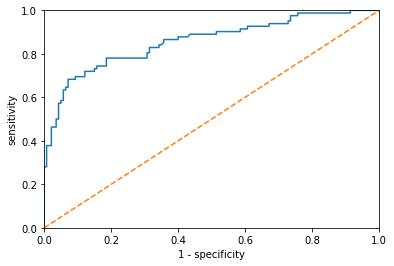

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, random_state=5)
print("whole dataset:", X1.shape, y.shape)

print("training set:", X_train.shape, y_train.shape)

print("test set:", X_test.shape, y_test.shape)
model = LogisticRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
y_pred = model.predict(X_test)
print("accuracy:", accuracy_score(y_test, y_pred))
print("precision:", precision_score(y_test, y_pred))
print("recall:", recall_score(y_test, y_pred))
print("f1 score:", f1_score(y_test, y_pred))

sensitivity_score = recall_score


def specificity_score(y_true, y_pred):
    p, r, f, s = precision_recall_fscore_support(y_true, y_pred)
    return r[0]


print("sensitivity:", sensitivity_score(y_test, y_pred))
print("specificity:", specificity_score(y_test, y_pred))
y_pred_thres = model.predict_proba(X_test)[:, 1] > 0.75
print("precision:", precision_score(y_test, y_pred_thres))
print("recall:", recall_score(y_test, y_pred_thres))

y_pred_proba = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('1 - specificity')
plt.ylabel('sensitivity')
plt.show()

In [6]:
"""
The closer the curve gets to the upper left corner,
the better the performance.
The line should never fall below the diagonal line as that would mean it performs worse than a random model.
"""

'\nThe closer the curve gets to the upper left corner,\nthe better the performance.\nThe line should never fall below the diagonal line as that would mean it performs worse than a random model.\n'